## Micromobility MNL Model 2-5 Miles

In [ ]:
import pandas as pd
import numpy as np
import biogeme as biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
import biogeme.messaging as msg
from biogeme.expressions import Beta
from biogeme.expressions import (
    Beta,
    DefineVariable,
    bioDraws,
    PanelLikelihoodTrajectory,
    MonteCarlo,
    log,
    Derive
)
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# import data
micro_pool_socio = pd.read_csv('micro_pool_socio_bio2up.csv')

# Create a new column with values 1 if PRCP is 1 or 2 and 0 otherwise
micro_pool_socio['PRCP_Yes'] = np.where((micro_pool_socio['PRCP'] == 1) | (micro_pool_socio['PRCP'] == 2), 1, 0)

# Create a new column with values 1 if BKLN is 1 or 2 or 3 and 0 otherwise
micro_pool_socio['BKLN_Yes'] = np.where((micro_pool_socio['BKLN'] == 1) | (micro_pool_socio['BKLN'] == 2) | (micro_pool_socio['BKLN'] == 3), 1, 0)
columns = micro_pool_socio.columns
print(columns)

# Check count of 1 and 0 in column BKLN_Yes
micro_pool_socio['BKLN_Yes'].value_counts()

Index(['zipn', 'p', 'dperson', 'sp', 'sccost', 'dlcost', 'dbcost', 'stcost',
       'sctime', 'dltime', 'dbtime', 'sttime', 'stransittime', 'sttotime',
       'SCAV', 'AVtech', 'STAV', 'DLAW', 'DBAW', 'DBDW', 'PRCP', 'BKLN',
       'TEMP', 'purpose', 'SCAW', 'STAW', 'scooter_av', 'dlbike_av',
       'dkbike_av', 'sctransit_av', 'triptime', 'car_av', 'transit_av',
       'rd_av', 'walk_av', 'bike_av', 'choice', 'cartime', 'transittime',
       'rdtime', 'walktime', 'biketime', 'PRCP_1', 'PRCP_2', 'PRCP_3',
       'BKLN_1', 'BKLN_2', 'BKLN_3', 'BKLN_4', 'purpose_1', 'purpose_2',
       'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6', 'who', 'age',
       'race', 'edu', 'work', 'zipcode', 'hhsize', 'child', 'hhincome',
       'idincome', 'veh', 'bike', 'higheredu', 'employ', 'white', 'stu_dummy',
       'mean_hhincome', 'veh_dummy', 'gender_F', 'gender_M', 'gender_O',
       'mean_idincome', 'originpurpose_errand', 'originpurpose_home',
       'originpurpose_school', 'originpurpose_sho

1    6644
0    2164
Name: BKLN_Yes, dtype: int64

In [15]:
#ASC_CAR = Beta('ASC_CAR', 0, None, None, 1)
#ASC_CAR_S = Beta('ASC_CAR_S', 1, None, None, 0)
#ASC_CAR_RND = ASC_CAR + ASC_CAR_S * bioDraws('ASC_CAR_RND', 'NORMAL_ANTI')

#ASC_TRANSIT = Beta('ASC_TRANSIT', 0, None, None, 0)
#ASC_TRANSIT_S = Beta('ASC_TRANSIT_S', 1, None, None, 0)
#ASC_TRANSIT_RND = ASC_TRANSIT + ASC_TRANSIT_S * bioDraws('ASC_TRANSIT_RND', 'NORMAL_ANTI')

# ASC_RH = Beta('ASC_RH', 0, None, None, 0)
# ASC_RH_S = Beta('ASC_RH_S', 1, None, None, 0)
# ASC_RH_RND = ASC_RH + ASC_RH_S * bioDraws('ASC_RH_RND', 'NORMAL_ANTI')

# ASC_WALK = Beta('ASC_WALK', 0, None, None, 0)
# ASC_WALK_S = Beta('ASC_WALK_S', 1, None, None, 0)
# ASC_WALK_RND = ASC_WALK + ASC_WALK_S * bioDraws('ASC_WALK_RND', 'NORMAL_ANTI')

# ASC_BIKE = Beta('ASC_BIKE', 0, None, None, 0)
# ASC_BIKE_S = Beta('ASC_BIKET_S', 1, None, None, 0)
# ASC_BIKE_RND = ASC_BIKE + ASC_BIKE_S * bioDraws('ASC_TRANSIT_RND', 'NORMAL_ANTI')

ASC_SCOOTER = Beta('ASC_SCOOTER', 0, None, None, 1)
ASC_SCOOTER_S = Beta('ASC_SCOOTER_S', 1, None, None, 0)
ASC_SCOOTER_RND = ASC_SCOOTER + ASC_SCOOTER_S * bioDraws('ASC_SCOOTER_RND', 'NORMAL_ANTI')

ASC_DLBIKE = Beta('ASC_DLBIKE', 0, None, None, 0)
ASC_DLBIKE_S = Beta('ASC_DLBIKE_S', 1, None, None, 0)
ASC_DLBIKE_RND = ASC_DLBIKE + ASC_DLBIKE_S * bioDraws('ASC_DLBIKE_RND', 'NORMAL_ANTI')

ASC_DKBIKE = Beta('ASC_DKBIKE', 0, None, None, 0)
ASC_DKBIKE_S = Beta('ASC_DKBIKE_S', 1, None, None, 0)
ASC_DKBIKE_RND = ASC_DKBIKE + ASC_DKBIKE_S * bioDraws('ASC_DKBIKE_RND', 'NORMAL_ANTI')

ASC_SCTRANSIT = Beta('ASC_SCTRANSIT', 0, None, None, 0)
ASC_SCTRANSIT_S = Beta('ASC_SCTRANSIT_S', 1, None, None, 0)
ASC_SCTRANSIT_RND = ASC_SCTRANSIT + ASC_SCTRANSIT_S * bioDraws('ASC_SCTRANSIT_RND', 'NORMAL_ANTI')

# B_CARTIME = Beta('B_CARTIME', 0, None, None, 0) #name, default value, lower bound, upper bound, estimate(Y0,N1)
# B_TRANSITTIME = Beta('B_TRANSITTIME', 0, None, None, 0)
# B_RHTIME = Beta('B_RHTIME', 0, None, None, 0)
# B_WALKTIME = Beta('B_WALKTIME', 0, None, None, 0)
# B_BIKETIME = Beta('B_BIKETIME', 0, None, None, 0)

B_SCOOTERTIME = Beta('B_SCOOTERTIME', 0, None, None, 0)
B_SCTRANSITTIME = Beta('B_SCTRANSITTIME', 0, None, None, 0)

B_ACCESS = Beta('B_ACCESS', 0, None, None, 0)
B_DROP =Beta('B_DROP', 0, None, None, 0)
B_WAITAV = Beta('B_WAITAV', 0, None, None, 0)
B_AV = Beta('B_AV', 0, None, None, 0)

B_PRCP1 = Beta('B_PRCP1', 0, None, None, 0)#Heavy rain
B_PRCP2 = Beta('B_PRCP2', 0, None, None, 0)#Light rain, ref: No rain

B_PRCP_Yes_Scoot = Beta('B_PRCP_Yes_Scoot', 0, None, None, 0)
B_PRCP_Yes_ScTransit = Beta('B_PRCP_Yes_ScTransit', 0, None, None, 0)

B_BIKEPRCP1 = Beta('B_BIKEPRCP1', 0, None, None, 0)#Heavy rain
B_BIKEPRCP2 = Beta('B_BIKEPRCP2', 0, None, None, 0)#Light rain, ref: No rain

B_SCOOTERPRCP1 = Beta('B_SCOOTERPRCP1', 0, None, None, 0)#Heavy rain
B_SCOOTERPRCP2 = Beta('B_SCOOTERPRCP2', 0, None, None, 0)#Light rain, ref: No rain


B_BIKEBKLN2 = Beta('B_BIKEBKLN2', 0, None, None, 0)#80% bikelane
B_BIKEBKLN3 = Beta('B_BIKEBKLN3', 0, None, None, 0)#half bikelane
B_BIKEBKLN4 = Beta('B_BIKEBKLN4', 0, None, None, 0)#no bikelane, ref: full bikelane

B_SCOOTERBKLN2 = Beta('B_SCOOTERBKLN2', 0, None, None, 0)#80% bikelane
B_SCOOTERBKLN3 = Beta('B_SCOOTERBKLN3', 0, None, None, 0)#half bikelane
B_SCOOTERBKLN4 = Beta('B_SCOOTERBKLN4', 0, None, None, 0)#no bikelane, ref: full bikelane
B_BKLN_YES = Beta('B_BKLN_YES', 0, None, None, 0)

# B_BIKEBKLNn = Beta('B_BIKEBKLNn', 0, None, None, 0)
# B_SCOOTERBKLNn = Beta('B_SCOOTERBKLNn', 0, None, None, 0)

# B_TEMPBIKE = Beta('B_TEMPbike', 0, None, None, 0)
# B_TEMPsqbike = Beta('B_TEMPsqbike', 0, None, None, 0)

# B_TEMPsc = Beta('B_TEMPsc', 0, None, None, 0)
# B_TEMPsqsc = Beta('B_TEMPsqsc', 0, None, None, 0)

# B_carHBW = Beta('B_carHBW', 0, None, None, 0)
# B_carHBSHOP = Beta('B_carHBSHOP', 0, None, None, 0)
# B_carHBSOC = Beta('B_carHBSOC', 0, None, None, 0)
# B_carHBO = Beta('B_carHBO', 0, None, None, 0)
# B_carNHB = Beta('B_carNHB', 0, None, None, 0)

# B_carPURPHome = Beta('B_carPURPHome', 0, None, None, 0)#go back home
# B_carPURPShop = Beta('B_carPURPShop', 0, None, None, 0)#shopping
# B_carPURPErra = Beta('B_carPURPErra', 0, None, None, 0)#errand
# B_carPURPScho = Beta('B_carPURPScho', 0, None, None, 0)#school/church
# B_carPURPSoci = Beta('B_carPURPSoci', 0, None, None, 0)#social

# B_carorigHome = Beta('B_carorigHome', 0, None, None, 0)
# B_carorigShop = Beta('B_carorigShop', 0, None, None, 0)
# B_carorigErra = Beta('B_carorigErra', 0, None, None, 0)
# B_carorigScho = Beta('B_carorigScho', 0, None, None, 0)
# B_carorigSoci = Beta('B_carorigSoci', 0, None, None, 0)

# B_transitHBW = Beta('B_transitHBW', 0, None, None, 0)
# B_transitHBSHOP = Beta('B_transitHBSHOP', 0, None, None, 0)
# B_transitHBSOC = Beta('B_transitHBSOC', 0, None, None, 0)
# B_transitHBO = Beta('B_transitHBO', 0, None, None, 0)
# B_transitNHB = Beta('B_transitNHB', 0, None, None, 0)

# B_transitPURPHome = Beta('B_transitPURPHome', 0, None, None, 0)#go back home
# B_transitPURPShop = Beta('B_transitPURPShop', 0, None, None, 0)#shopping
# B_transitPURPErra = Beta('B_transitPURPErra', 0, None, None, 0)#errand
# B_transitPURPScho = Beta('B_transitPURPScho', 0, None, None, 0)#school/church
# B_transitPURPSoci = Beta('B_transitPURPSoci', 0, None, None, 0)#social

# B_transitorigHome = Beta('B_transitorigHome', 0, None, None, 0)
# B_transitorigShop = Beta('B_transitorigShop', 0, None, None, 0)
# B_transitorigErra = Beta('B_transitorigErra', 0, None, None, 0)
# B_transitorigScho = Beta('B_transitorigScho', 0, None, None, 0)
# B_transitorigSoci = Beta('B_transitorigSoci', 0, None, None, 0)

# B_rhHBW = Beta('B_rhHBW', 0, None, None, 0)
# B_rhHBSHOP = Beta('B_rhHBSHOP', 0, None, None, 0)
# B_rhHBSOC = Beta('B_rhHBSOC', 0, None, None, 0)
# B_rhHBO = Beta('B_rhHBO', 0, None, None, 0)
# B_rhNHB = Beta('B_rhNHB', 0, None, None, 0)

# B_rhPURPHome = Beta('B_rhPURPHome', 0, None, None, 0)#go back home
# B_rhPURPShop = Beta('B_rhPURPShop', 0, None, None, 0)#shopping
# B_rhPURPErra = Beta('B_rhPURPErra', 0, None, None, 0)#errand
# B_rhPURPScho = Beta('B_rhPURPScho', 0, None, None, 0)#school/church
# B_rhPURPSoci = Beta('B_rhPURPSoci', 0, None, None, 0)#social

# B_rhorigHome = Beta('B_rhorigHome', 0, None, None, 0)
# B_rhorigShop = Beta('B_rhorigShop', 0, None, None, 0)
# B_rhorigErra = Beta('B_rhorigErra', 0, None, None, 0)
# B_rhorigScho = Beta('B_rhorigScho', 0, None, None, 0)
# B_rhorigSoci = Beta('B_rhorigSoci', 0, None, None, 0)

# B_walkHBW = Beta('B_walkHBW', 0, None, None, 0)
# B_walkHBSHOP = Beta('B_walkHBSHOP', 0, None, None, 0)
# B_walkHBSOC = Beta('B_walkHBSOC', 0, None, None, 0)
# B_walkHBO = Beta('B_walkHBO', 0, None, None, 0)
# B_walkNHB = Beta('B_walkNHB', 0, None, None, 0)

# B_walkPURPHome = Beta('B_walkPURPHome', 0, None, None, 0)#go back home
# B_walkPURPShop = Beta('B_walkPURPShop', 0, None, None, 0)#shopping
# B_walkPURPErra = Beta('B_walkPURPErra', 0, None, None, 0)#errand
# B_walkPURPScho = Beta('B_walkPURPScho', 0, None, None, 0)#school/church
# B_walkPURPSoci = Beta('B_walkPURPSoci', 0, None, None, 0)#social

# B_walkorigHome = Beta('B_walkorigHome', 0, None, None, 0)
# B_walkorigShop = Beta('B_walkorigShop', 0, None, None, 0)
# B_walkorigErra = Beta('B_walkorigErra', 0, None, None, 0)
# B_walkorigScho = Beta('B_walkorigScho', 0, None, None, 0)
# B_walkorigSoci = Beta('B_walkorigSoci', 0, None, None, 0)

# B_bikeHBW = Beta('B_bikeHBW', 0, None, None, 0)
# B_bikeHBSHOP = Beta('B_bikeHBSHOP', 0, None, None, 0)
# B_bikeHBSOC = Beta('B_bikeHBSOC', 0, None, None, 0)
# B_bikeHBO = Beta('B_bikeHBO', 0, None, None, 0)
# B_bikeNHB = Beta('B_bikeNHB', 0, None, None, 0)

# B_bikePURPHome = Beta('B_bikePURPHome', 0, None, None, 0)#go back home
# B_bikePURPShop = Beta('B_bikePURPShop', 0, None, None, 0)#shopping
# B_bikePURPErra = Beta('B_bikePURPErra', 0, None, None, 0)#errand
# B_bikePURPScho = Beta('B_bikePURPScho', 0, None, None, 0)#school/church
# B_bikePURPSoci = Beta('B_bikePURPSoci', 0, None, None, 0)#social

# B_bikeorigHome = Beta('B_bikeorigHome', 0, None, None, 0)
# B_bikeorigShop = Beta('B_bikeorigShop', 0, None, None, 0)
# B_bikeorigErra = Beta('B_bikeorigErra', 0, None, None, 0)
# B_bikeorigScho = Beta('B_bikeorigScho', 0, None, None, 0)
# B_bikeorigSoci = Beta('B_bikeorigSoci', 0, None, None, 0)

# B_microHBW = Beta('B_microHBW', 0, None, None, 0)
# B_microHBSHOP = Beta('B_microHBSHOP', 0, None, None, 0)
# B_microHBSOC = Beta('B_microHBSOC', 0, None, None, 0)
# B_microHBO = Beta('B_microHBO', 0, None, None, 0)
# B_microNHB = Beta('B_microNHB', 0, None, None, 0)

# B_microPURPHome = Beta('B_microPURPHome', 0, None, None, 0)#go back home
# B_microPURPShop = Beta('B_microPURPShop', 0, None, None, 0)#shopping
# B_microPURPErra = Beta('B_microPURPErra', 0, None, None, 0)#errand
# B_microPURPScho = Beta('B_microPURPScho', 0, None, None, 0)#school/church
# B_microPURPSoci = Beta('B_microPURPSoci', 0, None, None, 0)#social

# B_microorigHome = Beta('B_microorigHome', 0, None, None, 0)
# B_microorigShop = Beta('B_microorigShop', 0, None, None, 0)
# B_microorigErra = Beta('B_microorigErra', 0, None, None, 0)
# B_microorigScho = Beta('B_microorigScho', 0, None, None, 0)
# B_microorigSoci = Beta('B_microorigSoci', 0, None, None, 0)


B_CARAGE = Beta('B_CARAGE', 0, None, None, 0)
B_TRANSITAGE = Beta('B_TRANSITAGE', 0, None, None, 0)
B_RHAGE = Beta('B_RHAGE', 0, None, None, 0)
B_WALKAGE = Beta('B_WALKAGE', 0, None, None, 0)
B_BIKEAGE = Beta('B_BIKEAGE', 0, None, None, 0)
B_MICROAGE = Beta('B_MICROAGE', 0, None, None, 0)
B_AGE = Beta('B_AGE', 0, None, None, 0)

# B_caragesq = Beta('B_caragesq', 0, None, None, 0)
# B_transitagesq = Beta('B_transitagesq', 0, None, None, 0)
# B_rhagesq = Beta('B_rhagesq', 0, None, None, 0)
# B_walkagesq = Beta('B_walkagesq', 0, None, None, 0)
# B_bikeagesq = Beta('B_bikeagesq', 0, None, None, 0)
# B_microagesq = Beta('B_microagesq', 0, None, None, 0)

# B_carFe = Beta('B_carFe', 0, None, None, 0)
# B_transitFe = Beta('B_transitFe', 0, None, None, 0)
# B_rhFe = Beta('B_rhFe', 0, None, None, 0)
# B_walkFe = Beta('B_walkFe', 0, None, None, 0)
# B_bikeFe = Beta('B_bikeFe', 0, None, None, 0)
# B_scooterFe = Beta('B_scooterFe', 0, None, None, 0)
# B_sharedbikeFe = Beta('B_sharedbikeFe', 0, None, None, 0)


# B_carincomek = Beta('B_carincomek', 0, None, None, 0)
# B_transitincomek = Beta('B_transitincomek', 0, None, None, 0)
# B_rhincomek = Beta('B_rhincomek', 0, None, None, 0)
# B_walkincomek = Beta('B_walkincomek', 0, None, None, 0)
# B_bikeincomek = Beta('B_bikeincomek', 0, None, None, 0)
# B_microincomek = Beta('B_microincomek', 0, None, None, 0)

# B_carhedu = Beta('B_carhedu', 0, None, None, 0)
# B_transithedu = Beta('B_transithedu', 0, None, None, 0)
# B_rhhedu = Beta('B_rhhedu', 0, None, None, 0)
# B_walkhedu = Beta('B_walkhedu', 0, None, None, 0)
# B_bikehedu = Beta('B_bikehedu', 0, None, None, 0)
# B_microhedu = Beta('B_microhedu', 0, None, None, 0)

# B_caremp = Beta('B_caremp', 0, None, None, 0)
# B_transitemp = Beta('B_transitemp', 0, None, None, 0)
# B_rhemp = Beta('B_rhemp', 0, None, None, 0)
# B_walkemp = Beta('B_walkemp', 0, None, None, 0)
# B_bikeemp = Beta('B_bikeemp', 0, None, None, 0)
# B_microemp = Beta('B_microemp', 0, None, None, 0)

# B_carhhsize = Beta('B_carhhsize', 0, None, None, 0)
# B_transithhsize = Beta('B_transithhsize', 0, None, None, 0)
# B_rhhhsize = Beta('B_rhhhsize', 0, None, None, 0)
# B_walkhhsize = Beta('B_walkhhsize', 0, None, None, 0)
# B_bikehhsize = Beta('B_bikehhsize', 0, None, None, 0)
# B_microhhsize = Beta('B_microhhsize', 0, None, None, 0)

# B_carPBIKE = Beta('B_carPBIKE', 0, None, None, 0)
# B_transitPBIKE = Beta('B_transitPBIKE', 0, None, None, 0)
# B_rhPBIKE = Beta('B_rhPBIKE', 0, None, None, 0)
# B_walkPBIKE = Beta('B_walkPBIKE', 0, None, None, 0)
# B_bikePBIKE = Beta('B_bikePBIKE', 0, None, None, 0)
# B_microPBIKE = Beta('B_microPBIKE', 0, None, None, 0)

# B_carpop = Beta('B_carpop', 0, None, None, 0)
# B_transitpop = Beta('B_transitpop', 0, None, None, 0)
# B_rhpop = Beta('B_rhpop', 0, None, None, 0)
# B_walkpop = Beta('B_walkpop', 0, None, None, 0)
# B_bikepop = Beta('B_bikepop', 0, None, None, 0)
# B_micropop = Beta('B_micropop', 0, None, None, 0)


B_COST = Beta('B_COST', 0, None, None, 0)
B_costadj = Beta('B_costadj', 0, None, None, 0)



1575


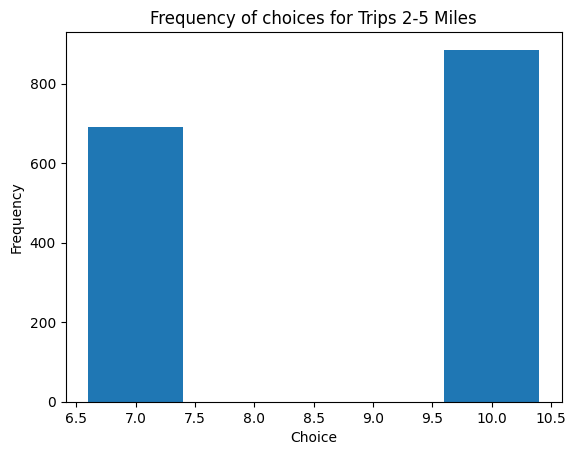

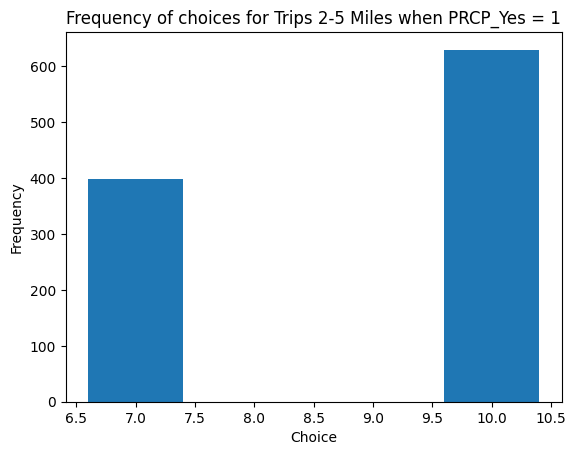

In [24]:
# Micromobility trip 2-5 miles
micro2to5 = (micro_pool_socio['scooter_av'] == 1) & (micro_pool_socio['dlbike_av'] == 0) & (micro_pool_socio['dkbike_av'] == 0) & (micro_pool_socio['car_av'] == 0) & (micro_pool_socio['transit_av'] == 0) & (micro_pool_socio['rd_av'] == 0) & (micro_pool_socio['walk_av'] == 0) & (micro_pool_socio['bike_av'] == 0) & (micro_pool_socio['sctransit_av'] == 1)
micro_2_to_5= micro_pool_socio.loc[micro2to5]

# Number of respondents for micromobility only option for less than 2 miles
num_respondents = len(micro_2_to_5)
print(num_respondents)

freq = micro_2_to_5['choice'].value_counts()
plt.bar(freq.index, freq.values)
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.title('Frequency of choices for Trips 2-5 Miles')
plt.show()

# 7 = scooter
# 10 = scooter + transit

# Bar plot of how many people chose option 7 (scooter) when PRCP_Yes = 1 versus PRCP_Yes = 0 --> as predicted
freq = micro_2_to_5.loc[micro_2_to_5['PRCP_Yes'] == 1]['choice'].value_counts()
plt.bar(freq.index, freq.values)
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.title('Frequency of choices for Trips 2-5 Miles when PRCP_Yes = 1')
plt.show()

# Bar plot of how many people chose option 7 (scooter) when BKLN_Yes = 1 versus BKLN_Yes = 0 --> not as predicted
# freq = micro_2_to_5.loc[micro_2_to_5['BKLN_Yes'] == 1]['choice'].value_counts()
# plt.bar(freq.index, freq.values)
# plt.xlabel('Choice')
# plt.ylabel('Frequency')
# plt.title('Frequency of choices for Trips 2-5 Miles when BKLN_Yes = 1')
# plt.show()



In [17]:
database3 = db.Database('micro_2_to_5', micro_2_to_5)
globals().update(database3.variables) 

In [28]:
#V1 = ASC_CAR + B_CARTIME*cartime
#V2 = ASC_TRANSIT + B_TRANSITTIME*transittime
#V3 = ASC_RH + B_RHTIME*rdtime
#V4 = ASC_WALK + B_WALKTIME*walktime
#V5 = ASC_BIKE + B_BIKETIME*biketime
V7 = (ASC_SCOOTER 
      + B_SCOOTERTIME*sctime 
      + B_COST*sccost_adj
      + B_ACCESS*SCAW*(1-AVtech)
      + B_WAITAV*SCAV*AVtech
      #+ B_PRCP_Yes_Scoot*PRCP_Yes
      )
#V8 = ASC_DLBIKE+ B_DLBIKETIME*dltime + B_COST*dlcost_adj
#V9 = ASC_DBIKE + B_DBIKETIME*dbtime + B_COST*dbcost_adj
V10 = (ASC_SCTRANSIT
       + B_SCTRANSITTIME*sttotime
        + B_COST*sttocost_adj 
        + B_ACCESS*STAW*(1-AVtech)
        + B_WAITAV*STAV*AVtech
        + B_PRCP_Yes_ScTransit*PRCP_Yes
      )
# assumes same value of time for scooter time and transit time individually and collectively
# why is there no cost for conventional modes ???


In [29]:
V = {7: V7, 10: V10} # Associating the utility functions with the numbering of the alternatives
av = {7: scooter_av, 10: sctransit_av} # Associating the availability conditions with the alternatives

logprob = models.loglogit(V, av, choice)
biogeme = bio.BIOGEME(database3, logprob)
biogeme.modelName = 'micromobility_mnl_2_to_5'

biogeme.calculateNullLoglikelihood(av)
model_results = biogeme.estimate()
pandasResults = model_results.getEstimatedParameters()
print(pandasResults.round(2))

                      Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_SCTRANSIT         -1.24          0.21        -5.87          0.00
B_ACCESS              -0.06          0.03        -2.30          0.02
B_COST                -1.22          0.29        -4.17          0.00
B_PRCP_Yes_ScTransit   0.56          0.11         5.12          0.00
B_SCOOTERTIME         -0.03          0.01        -2.31          0.02
B_SCTRANSITTIME        0.03          0.02         1.51          0.13
B_WAITAV              -0.07          0.03        -2.38          0.02
